# **Self- Organizing Maps Model Theory**


## Self-Organizing Maps (SOM)

---

## Theory
Self-Organizing Maps (SOM), also known as Kohonen Maps, are a type of unsupervised neural network used for dimensionality reduction and clustering. SOMs create a low-dimensional (typically 2D) representation of high-dimensional data while preserving the topological structure of the input space. They are widely used in data visualization, feature extraction, and exploratory data analysis.

The main idea is to:
- Map high-dimensional data onto a low-dimensional grid (usually 2D).
- Preserve the topological relationships between data points.
- Use competitive learning to adjust the weights of the neurons in the grid.

---

## Mathematical Foundation
- **Neuron Weights**:
  Each neuron in the SOM grid has a weight vector \( w_i \) of the same dimensionality as the input data.

- **Distance Metric**:
  The Euclidean distance between an input vector \( x \) and a neuron's weight vector \( w_i \):
  $$ d(x, w_i) = \|x - w_i\| $$

- **Best Matching Unit (BMU)**:
  The neuron with the smallest distance to the input vector:
  $$ \text{BMU} = \arg\min_i \|x - w_i\| $$

- **Neighborhood Function**:
  A function that determines how much the weights of neighboring neurons are updated. Commonly, a Gaussian function is used:
  $$ h_{ij}(t) = \exp\left(-\frac{\|r_i - r_j\|^2}{2\sigma(t)^2}\right) $$
  - \( r_i, r_j \): Positions of neurons \( i \) and \( j \) on the grid.
  - \( \sigma(t) \): Neighborhood radius at iteration \( t \).

- **Weight Update**:
  The weights of the neurons are updated iteratively:
  $$ w_i(t+1) = w_i(t) + \alpha(t) \cdot h_{ij}(t) \cdot (x - w_i(t)) $$
  - \( \alpha(t) \): Learning rate at iteration \( t \).

---

## Algorithm Steps
1. **Initialization**:
   - Initialize the weight vectors \( w_i \) of all neurons randomly or using PCA.

2. **Training**:
   - For each input vector \( x \):
     1. Find the BMU.
     2. Update the weights of the BMU and its neighbors using the neighborhood function and learning rate.

3. **Convergence**:
   - Repeat the training process until convergence (when the weight updates become negligible).

---

## Key Parameters
- **map_size**: The size of the SOM grid (e.g., `(10, 10)` for a 10x10 grid).
- **sigma**: The initial neighborhood radius.
- **learning_rate**: The initial learning rate.
- **num_iterations**: The number of training iterations.

---

## Advantages
- Preserves the topological structure of the input data.
- Effective for data visualization and exploratory analysis.
- Handles high-dimensional data well.
- Robust to noise and outliers.

---

## Disadvantages
- Computationally expensive for large datasets.
- Requires careful tuning of parameters (e.g., map size, learning rate).
- Sensitive to initialization.
- Struggles with non-uniform data distributions.

---

## Implementation Tips
- Use **PCA initialization** to improve convergence.
- Scale features before training to ensure equal contribution from all features.
- Use a **decreasing learning rate** and **neighborhood radius** over time for better results.
- Visualize the SOM grid using U-Matrix or component planes for interpretation.

---

## Applications
- Data visualization
- Feature extraction
- Customer segmentation
- Image compression
- Anomaly detection

Self-Organizing Maps are a powerful and flexible tool for dimensionality reduction and clustering, especially for high-dimensional data. While they require careful tuning and can be computationally expensive, they are widely used in many real-world applications.

## Model Evaluation for Self-Organizing Maps (SOM)

---

### 1. Quantization Error
**Formula:**
$$
\text{Quantization Error} = \frac{1}{N} \sum_{i=1}^N ||x_i - w_{c_i}||
$$
**Description:**
- Measures the average distance between each data point and its best-matching unit (BMU) in the SOM.
- Indicates how well the SOM represents the input data.

**Interpretation:**
- Lower values indicate better representation of the data.
- Useful for comparing different SOM configurations.

---

### 2. Topographic Error
**Formula:**
$$
\text{Topographic Error} = \frac{1}{N} \sum_{i=1}^N \mathbb{I}(\text{BMU}_1 \text{ and } \text{BMU}_2 \text{ are not adjacent})
$$
**Description:**
- Measures the proportion of data points for which the first and second BMUs are not adjacent on the SOM grid.
- Indicates how well the SOM preserves the topology of the input data.

**Interpretation:**
- Lower values indicate better preservation of topology.
- Values close to 0 indicate a well-organized map.

---

### 3. Silhouette Score
**Formula:**
$$
\text{Silhouette Score} = \frac{b - a}{\max(a, b)}
$$
**Description:**
- Measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- Ranges from -1 to 1.

**Interpretation:**
- Values close to 1 indicate well-separated clusters.
- Values close to 0 indicate overlapping clusters.
- Negative values suggest incorrect clustering.

---

### 4. Davies-Bouldin Index
**Formula:**
$$
\text{DBI} = \frac{1}{k} \sum_{i=1}^k \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right)
$$
**Description:**
- Measures the average similarity ratio of each cluster with the cluster that is most similar to it.
- Lower values indicate better clustering.

**Interpretation:**
- Values closer to 0 indicate better-defined clusters.
- Sensitive to the number of clusters and their separation.

---

### 5. Calinski-Harabasz Index
**Formula:**
$$
\text{CHI} = \frac{\text{Between-Cluster Dispersion}}{\text{Within-Cluster Dispersion}} \times \frac{N - k}{k - 1}
$$
**Description:**
- Measures the ratio of between-cluster dispersion to within-cluster dispersion.
- Higher values indicate better-defined clusters.

**Interpretation:**
- Higher values indicate better clustering.
- Useful for comparing different parameter settings.

---

### 6. Rand Index
**Formula:**
$$
\text{Rand Index} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$
**Description:**
- Measures the similarity between two clusterings by counting pairs of points that are assigned to the same or different clusters in both clusterings.

**Interpretation:**
- Ranges from 0 to 1, where 1 indicates perfect agreement.
- Requires ground truth labels for evaluation.

---

### 7. Adjusted Rand Index (ARI)
**Formula:**
$$
\text{ARI} = \frac{\text{Rand Index} - \text{Expected Rand Index}}{\max(\text{Rand Index}) - \text{Expected Rand Index}}
$$
**Description:**
- Adjusted version of the Rand Index that accounts for chance agreement.
- Ranges from -1 to 1.

**Interpretation:**
- Values close to 1 indicate strong agreement.
- Values close to 0 or negative indicate random or poor clustering.

---

### 8. Homogeneity, Completeness, and V-Measure
**Formulas:**
- **Homogeneity:**  
  $$
  h = 1 - \frac{H(C|K)}{H(C)}
  $$
- **Completeness:**  
  $$
  c = 1 - \frac{H(K|C)}{H(K)}
  $$
- **V-Measure:**  
  $$
  v = 2 \cdot \frac{h \cdot c}{h + c}
  $$

**Description:**
- **Homogeneity:** Measures if each cluster contains only members of a single class.
- **Completeness:** Measures if all members of a given class are assigned to the same cluster.
- **V-Measure:** Harmonic mean of homogeneity and completeness.

**Interpretation:**
- Ranges from 0 to 1, where 1 indicates perfect clustering.
- Requires ground truth labels for evaluation.

---

### 9. U-Matrix (Unified Distance Matrix)
**Description:**
- A visualization of the distances between neighboring neurons in the SOM.
- Helps identify clusters and their boundaries.

**Interpretation:**
- Darker regions indicate larger distances (potential cluster boundaries).
- Lighter regions indicate smaller distances (potential clusters).

---

### 10. Cluster Stability
**Description:**
- Measures the consistency of clustering results across different training runs or subsamples of the data.
- Evaluated using techniques like bootstrapping or cross-validation.

**Interpretation:**
- Higher stability indicates more reliable clustering.
- Useful for assessing the robustness of SOM.

---

## sklearn template [sckit-kit: model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)


# Self- Organizing Maps - Example

## Data loading

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = pd.Series(data.target)  # Target variable (for comparison, not used in clustering)

# Display the first few rows of the dataset
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target (y):
0    0
1    0
2    0
3    0
4    0
dtype: int64


##  Data processing

In [5]:
# Standardize the features (SOMs are sensitive to feature scales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier plotting
X_scaled = pd.DataFrame(X_scaled, columns=data.feature_names)

# Display the first few rows of the scaled data
print("Scaled Features:")
print(X_scaled.head())

Scaled Features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


## Plotting data

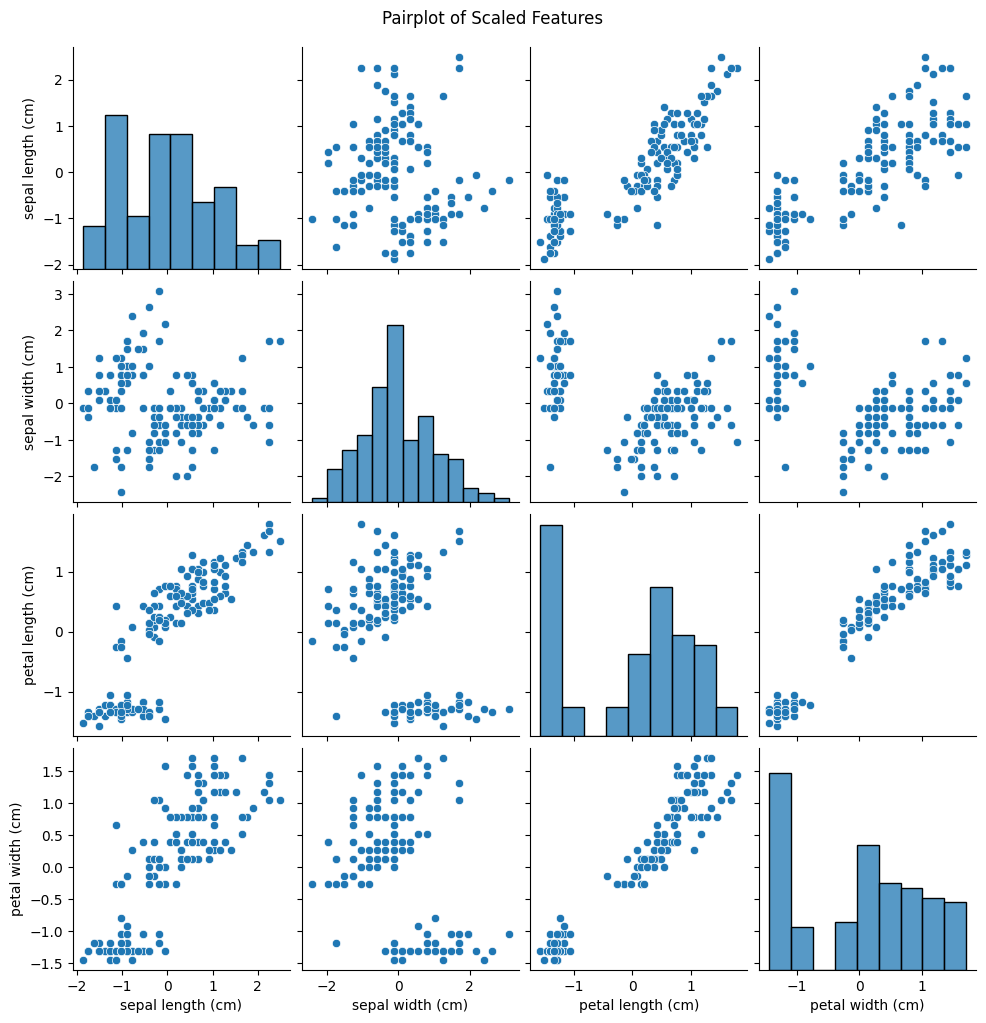

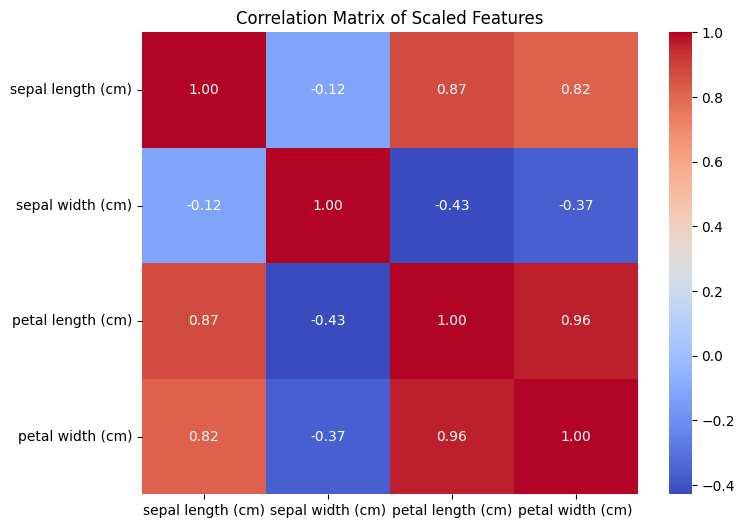

In [6]:
# Plot the distribution of features
sns.pairplot(X_scaled)
plt.suptitle("Pairplot of Scaled Features", y=1.02)
plt.show()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(X_scaled.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Scaled Features")
plt.show()

## Model definition

In [7]:
# Define the SOM grid size
map_size = (10, 10)  # 10x10 grid

# Initialize the SOM
som = MiniSom(map_size[0], map_size[1], X_scaled.shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)

# Train the SOM
som.train_random(X_scaled.values, 100)  # Train for 100 iterations

# Get the cluster labels (assign each data point to the closest neuron)
cluster_labels = np.array([som.winner(x) for x in X_scaled.values])
cluster_labels = cluster_labels[:, 0] * map_size[1] + cluster_labels[:, 1]  # Flatten 2D grid to 1D labels

# Add cluster labels to the original dataset for visualization
X['Cluster'] = cluster_labels
print("Cluster Labels:")
print(X.head())

Cluster Labels:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0       73  
1       92  
2       83  
3       92  
4       72  


## Model evaulation

Silhouette Score: 0.0430


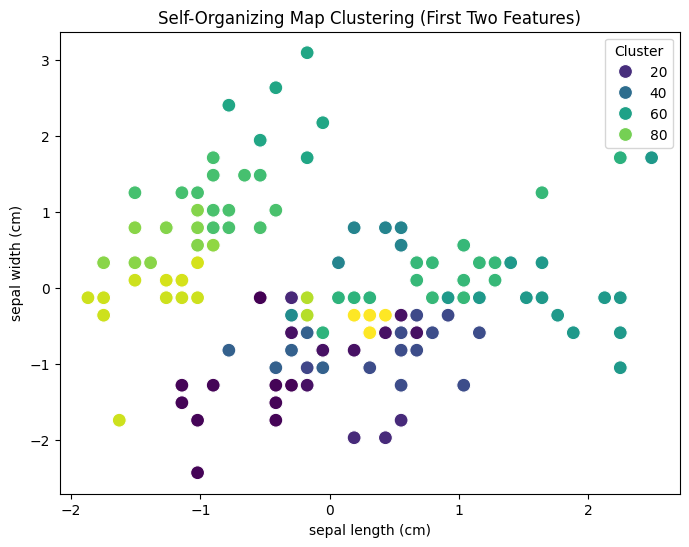

In [9]:
# Evaluate the clustering using Silhouette Score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Plot the SOM clusters (using the first two features for visualization)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled.iloc[:, 0], y=X_scaled.iloc[:, 1], hue=cluster_labels, palette='viridis', s=100)
plt.title("Self-Organizing Map Clustering (First Two Features)")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend(title='Cluster')
plt.show()

# Compare clusters